# Notebook 2: Time-Course Simulation

**Objective:** Simulate the system's dynamics over time from a given set of initial conditions and parameters. This notebook helps visualize the long-term behavior, such as convergence to an equilibrium or a limit cycle.

In [1]:
import numpy as np
import sys

# Add project root to path
if '..' not in sys.path:
    sys.path.append('..')

from config import get_params
from chemostat_analysis.equilibria import find_equilibria
from chemostat_analysis.simulation import run_simulation
from chemostat_analysis.visualization import plot_time_series, plot_phase_portrait

/Users/xuanthanhnguyen/Library/CloudStorage/OneDrive-HanoiUniversityofScienceandTechnology/2024-1/Leftt/2024-2/Maths Modelling/code/chemostat_foodchain_analyzer/notebooks/../chemostat_analysis/equilibria.py:3: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  from scipy.optimize import fsolve, root_scalar


### Simulation 1: Stable Coexistence

We start the system near the stable E3 equilibrium and watch it converge.

Running simulation for 'stable_coexistence' with initial conditions: [0.627 0.561 0.03  0.064]
Plot saved to: ../results/plots/time_series/stable_coexistence.png


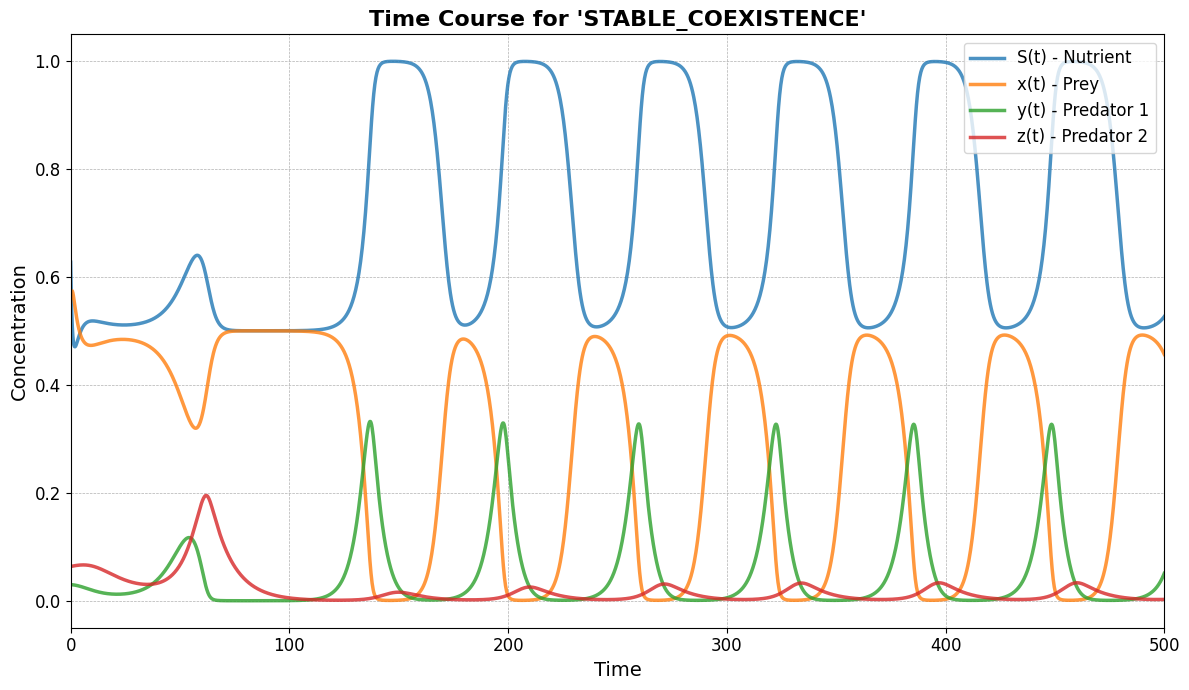

Plot saved to: ../results/plots/phase_portraits/stable_coexistence.png


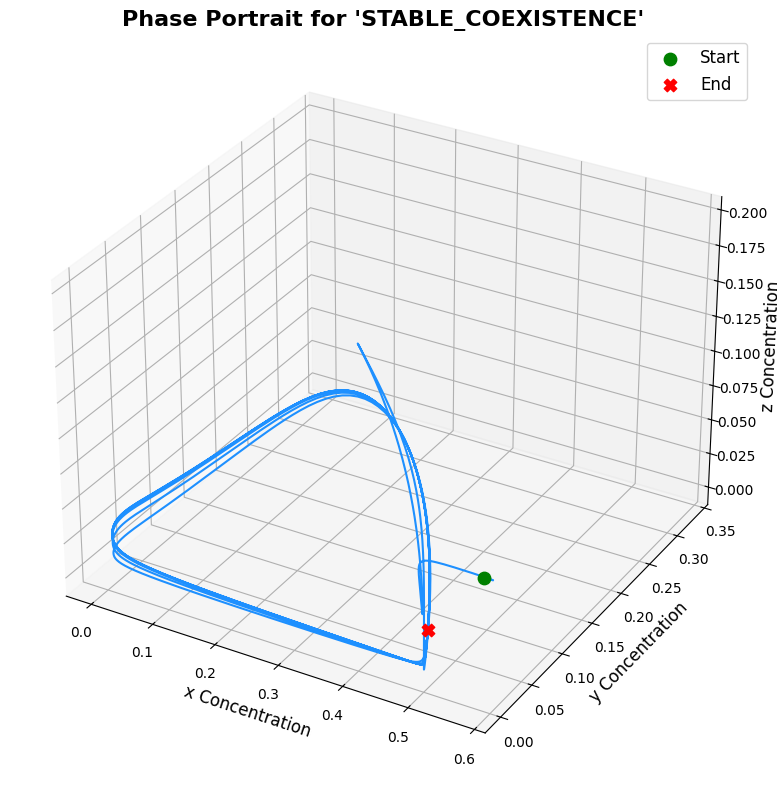

In [2]:
scenario = "stable_coexistence"
params = get_params(scenario)
equilibria = find_equilibria(params)

# Start with a slight perturbation from the E3 equilibrium
U0 = equilibria.get("E3", np.array([1, 0.1, 0.1, 0.1])) * 1.2
U0[U0 == 0] = 0.01

print(f"Running simulation for '{scenario}' with initial conditions: {np.round(U0, 3)}")

t_span = (0, 500)
# ... (code to run simulation) ...
solution = run_simulation(U0, params, t_span)

# --- Define save paths and call plotting functions ---
time_series_path = f'../results/plots/time_series/{scenario}.png'
phase_portrait_path = f'../results/plots/phase_portraits/{scenario}.png'

plot_time_series(solution, title=f"Time Course for '{scenario.upper()}'", save_path=time_series_path)
plot_phase_portrait(solution, dims=['x', 'y', 'z'], title=f"Phase Portrait for '{scenario.upper()}'", save_path=phase_portrait_path)

### Simulation 2: Oscillations

Here, the E3 equilibrium is unstable. We expect the system to settle into a stable limit cycle.

Running simulation for 'oscillations' with initial conditions: [0.364 0.664 0.008 0.064]
Plot saved to: ../results/plots/time_series/oscillations.png


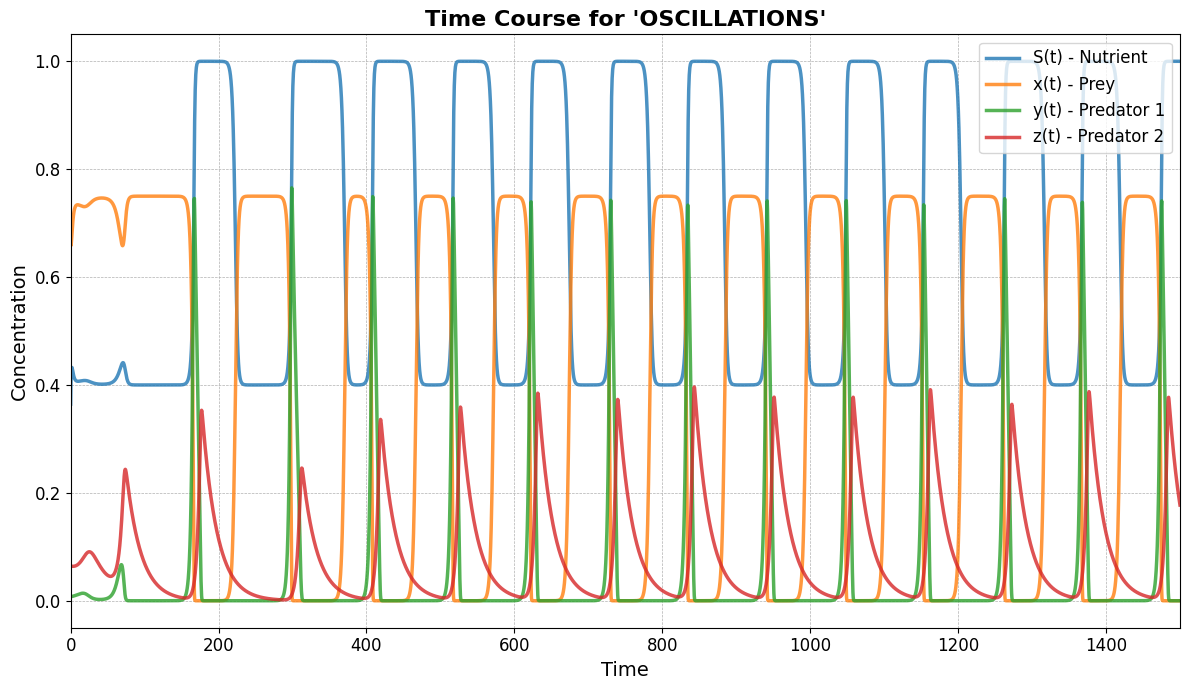

Plot saved to: ../results/plots/phase_portraits/oscillations.png


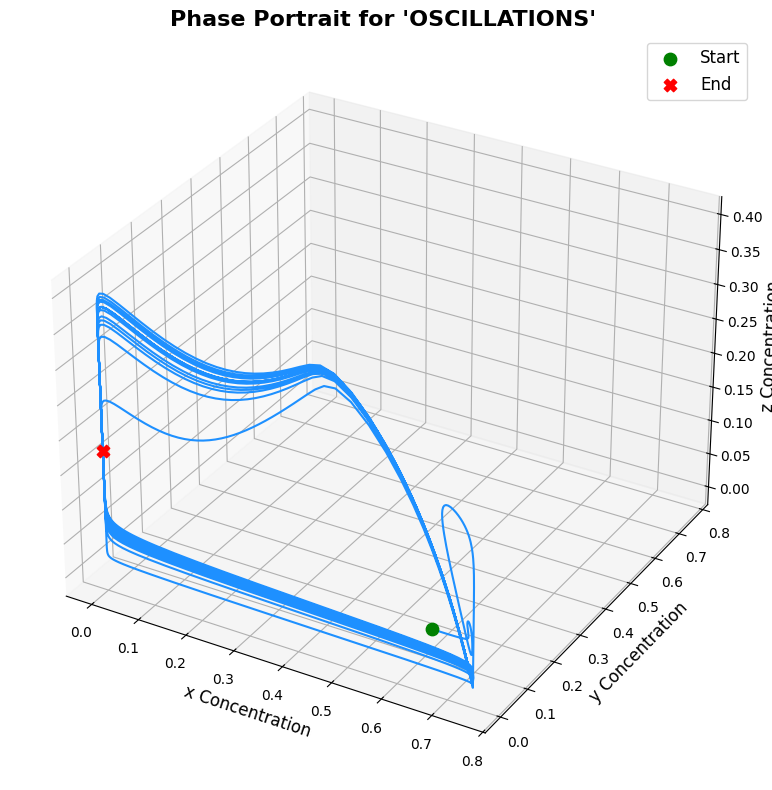

In [3]:
scenario = "oscillations"
params = get_params(scenario)
equilibria = find_equilibria(params)

# Start with a slight perturbation from the unstable E3 equilibrium
U0 = equilibria.get("E3", np.array([1, 0.1, 0.1, 0.1])) * 0.9
U0[U0 == 0] = 0.01

print(f"Running simulation for '{scenario}' with initial conditions: {np.round(U0, 3)}")

t_span = (0, 1500)
solution = run_simulation(U0, params, t_span, t_eval_count=4000)

# --- Define save paths and call plotting functions ---
time_series_path = f'../results/plots/time_series/{scenario}.png'
phase_portrait_path = f'../results/plots/phase_portraits/{scenario}.png'

plot_time_series(solution, title=f"Time Course for '{scenario.upper()}'", save_path=time_series_path)
plot_phase_portrait(solution, dims=['x', 'y', 'z'], title=f"Phase Portrait for '{scenario.upper()}'", save_path=phase_portrait_path)

### Simulation 3: Collapse to a Lower-Order Equilibrium

We start with all species present, but using parameters for which only E1 (Prey-Only) is stable. We expect the predators to die out.

Running simulation for 'prey_only' with initial conditions: [0.8 0.5 0.2 0.1]
Plot saved to: ../results/plots/time_series/prey_only.png


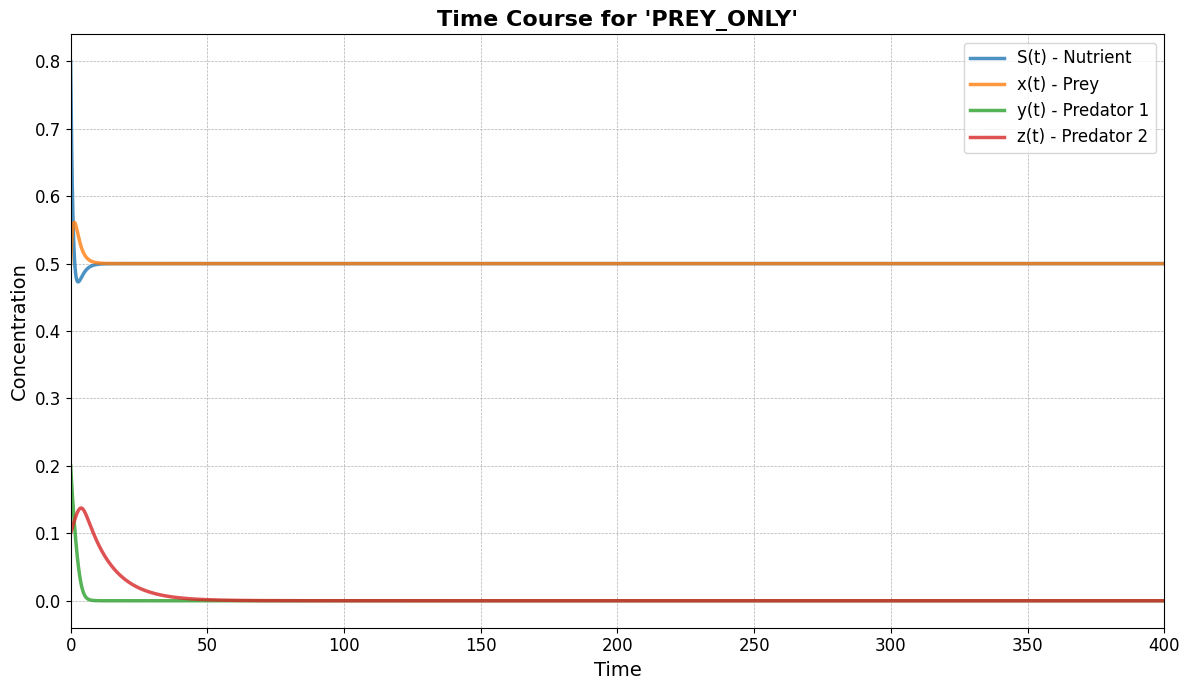

In [4]:
scenario = "prey_only"
params = get_params(scenario)

# Start with all species present
U0 = np.array([0.8, 0.5, 0.2, 0.1])

print(f"Running simulation for '{scenario}' with initial conditions: {np.round(U0, 3)}")

t_span = (0, 400)
solution = run_simulation(U0, params, t_span)

# --- Define save path and call plotting function ---
time_series_path = f'../results/plots/time_series/{scenario}.png'

plot_time_series(solution, title=f"Time Course for '{scenario.upper()}'", save_path=time_series_path)
